In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target

columns = ['pixel' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['label'] = y
df['label'] = df['label'].apply(lambda x: float(x))

rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

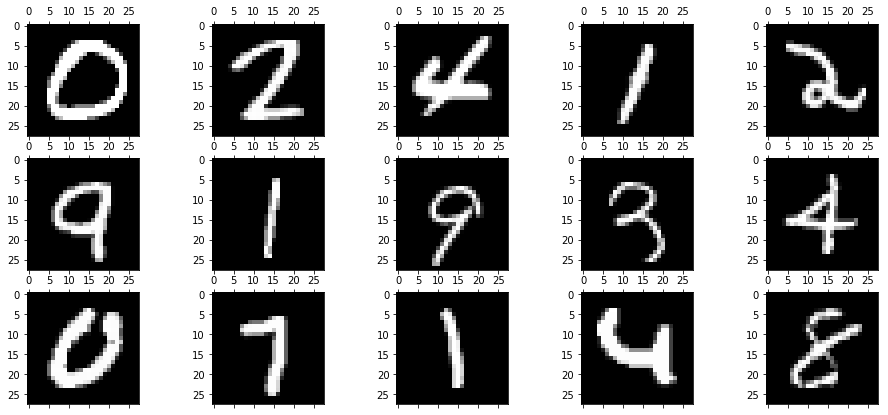

In [3]:
plt.gray()
fig = plt.figure(figsize=(16, 7))
for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.matshow(df.loc[rndperm[i], columns].values.reshape((28, 28)).astype(float))
plt.show()

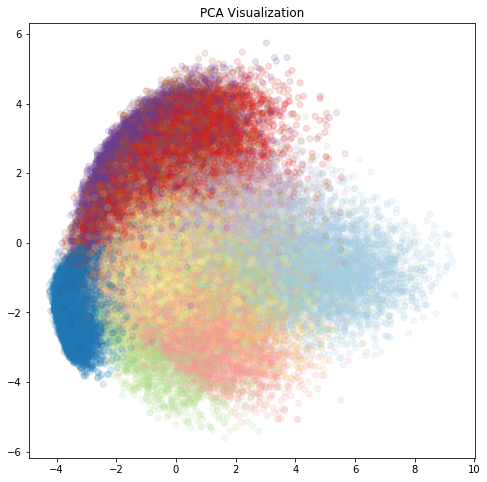

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[columns].values)
df['pca-1'] = pca_result[:, 0]
df['pca-2'] = pca_result[:, 1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, title='PCA Visualization')
ax.scatter(x=df['pca-1'],
           y=df['pca-2'],
           c=df['label'],
           cmap=plt.cm.get_cmap('Paired'),
           alpha=0.15)

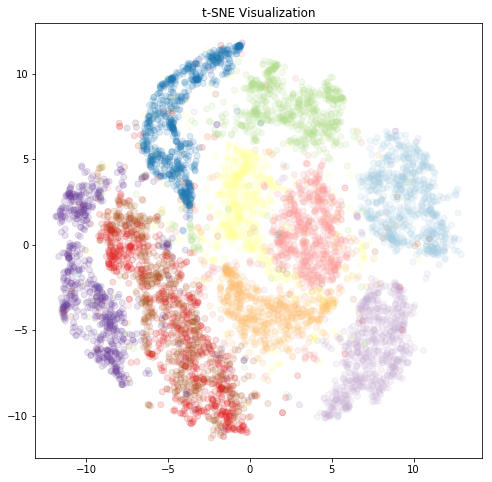

In [5]:
n_sne = 7000

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], columns].values)
df_tsne = df.loc[rndperm[:n_sne], :].copy()
df_tsne['x-tsne'] = tsne_results[:, 0]
df_tsne['y-tsne'] = tsne_results[:, 1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, title='t-SNE Visualization')
ax.scatter(x=df_tsne['x-tsne'],
           y=df_tsne['y-tsne'],
           c=df_tsne['label'],
           cmap=plt.cm.get_cmap('Paired'),
           alpha=0.15)

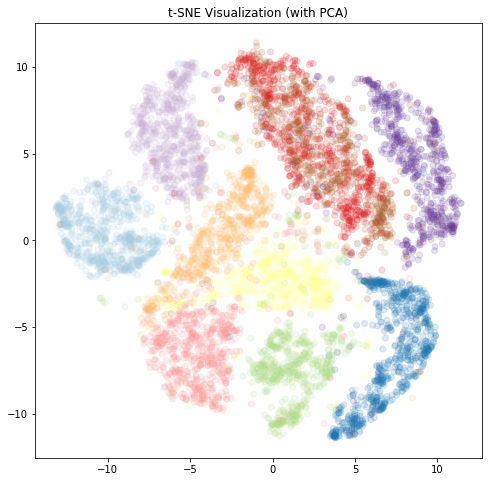

In [6]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(df[columns].values)
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result[rndperm[:n_sne]])
df_tsne = df.loc[rndperm[:n_sne], :].copy()
df_tsne['x-tsne'] = tsne_results[:, 0]
df_tsne['y-tsne'] = tsne_results[:, 1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, title='t-SNE Visualization (with PCA)')
ax.scatter(x=df_tsne['x-tsne'],
           y=df_tsne['y-tsne'],
           c=df_tsne['label'],
           cmap=plt.cm.get_cmap('Paired'),
           alpha=0.15)